##                                                                         Car Price Prediction

## Step1- Basic Data understanding and exploration

In [1]:
#importing the required libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Reading dataset
pricing = pd.read_csv("D:/DataScience2019-20/Course2/Assignments/Linear Regression Assignment/CarPrice_Assignment.csv")
pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Understanding the number of rows and column in the dataset
pricing.shape

(205, 26)

In [4]:
#Getting the details of the dataset: 205 rows and all non-null values
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
#Getting the insights about the numerical data
pricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#Viewing the unique values in the variable - "symboling"
pricing.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [6]:
#Symboling is an ordered categorical variables so label encoding can be done on it.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Symboling

le.fit(pricing.symboling.drop_duplicates()) 
pricing.symboling = le.transform(pricing.symboling)

pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,5,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,5,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# Assigning numerical values to the string values in "cylindernumber"

varlist = ['cylindernumber']
pricing[varlist] = pricing[varlist].apply(lambda x : x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12}))
pricing.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,5,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [8]:
# Split the car name into its' company name and model name

pricing[['Company','CarModel']] = pricing['CarName'].str.split(' ',n=1, expand = True)
pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,CarModel
0,1,5,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,5,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [9]:
#Dropping some of the unwanted variables 

pricing = pricing.drop(['CarName','car_ID','CarModel'] , axis = 1)
pricing.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,5,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


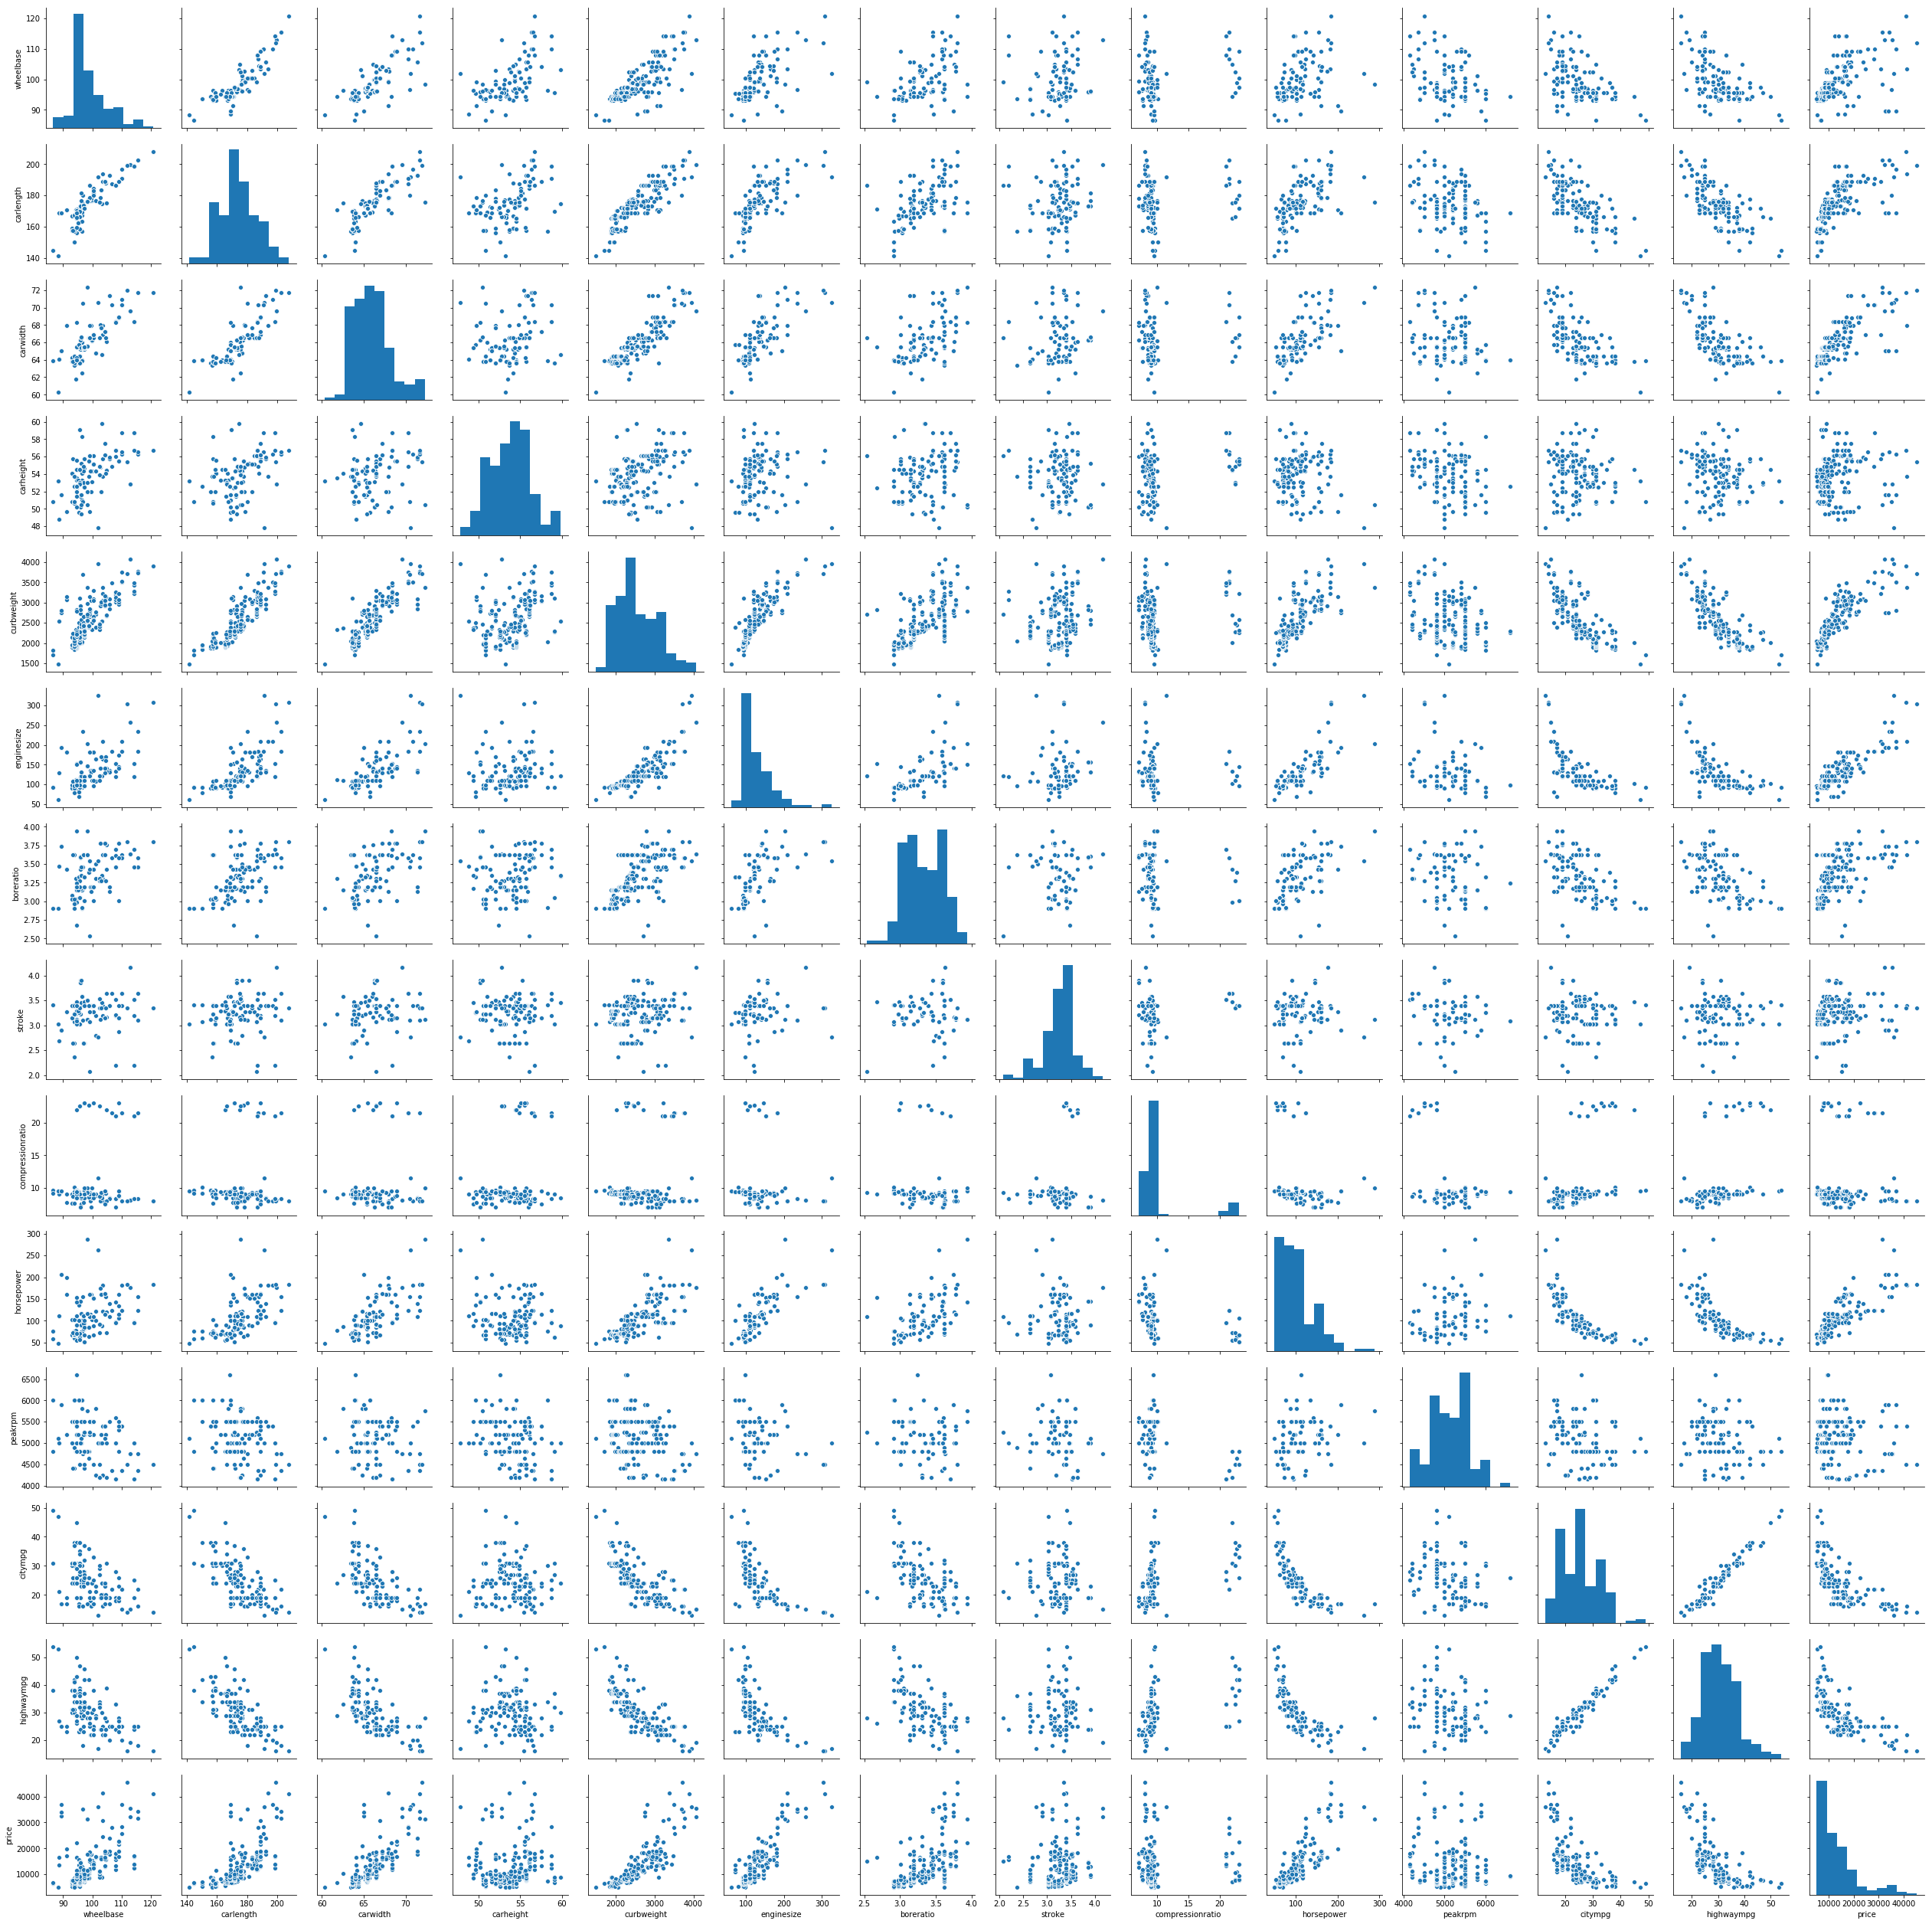

In [10]:
# Creating the scatter plot for all predictor variables having integer/numeric values only

numerical_pricing = pricing[['wheelbase', 'carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
sns.pairplot(numerical_pricing)

## Diving the above predictor variables into two sets to increase the readability in the scatterplots.

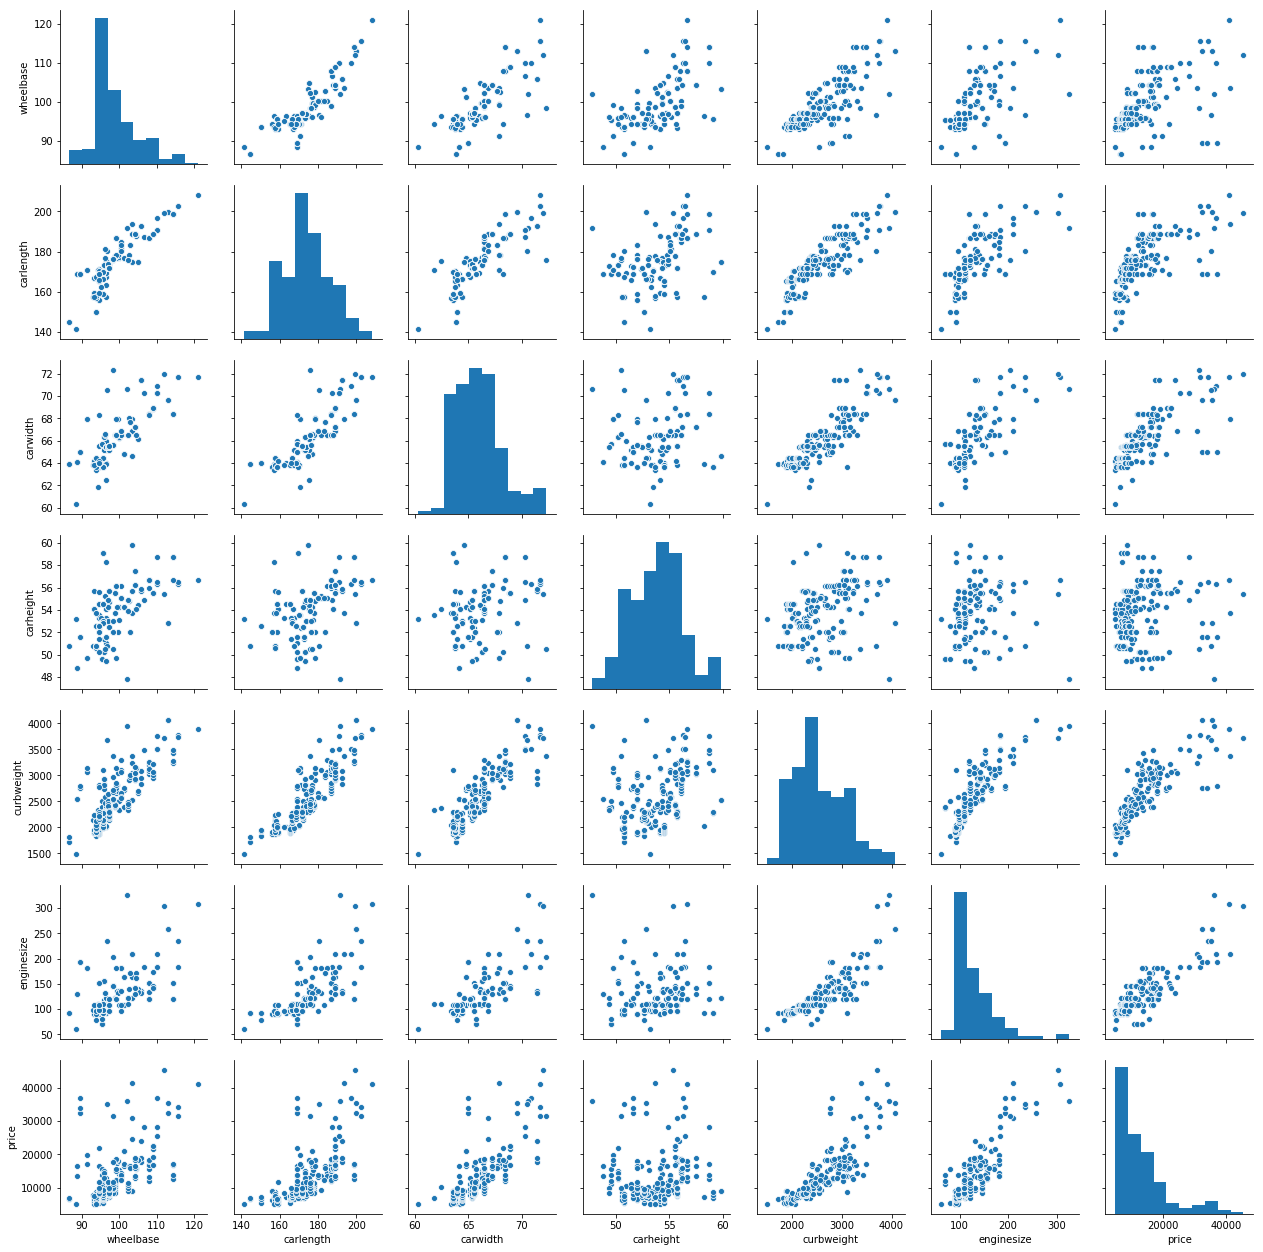

In [11]:
#Set1 of the numerical variables

numerical_pricing1 = pricing[['wheelbase', 'carlength','carwidth','carheight','curbweight','enginesize','price']]

sns.pairplot(numerical_pricing1)

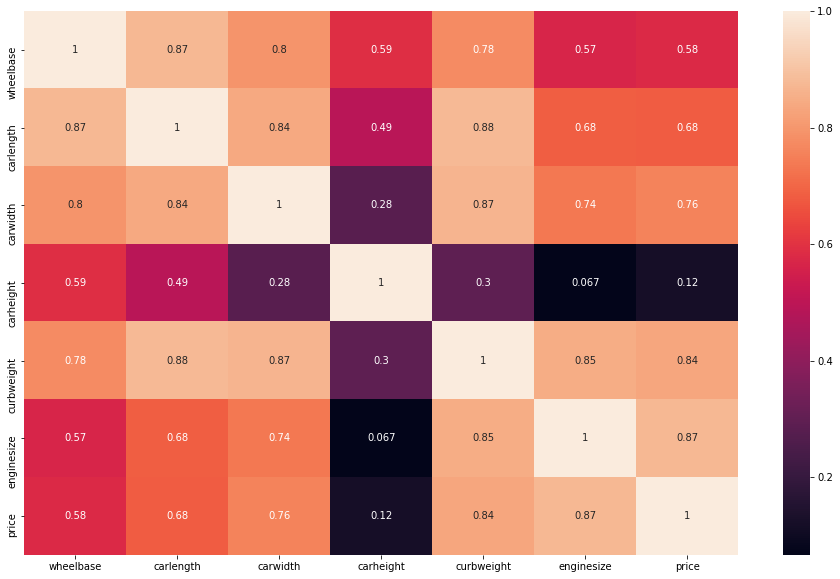

In [12]:
#Heatmap of the same dataset (set1)

plt.figure(figsize = (16,10))
sns.heatmap(numerical_pricing1.corr(), annot = True)
plt.show()

- In the above scatterplots, enginesize seems to have the highest linear correlation with price. Also curbweight is another 
variable showing positive correlation with price. However, another interesting thing to note is that "enginesize" and "curbweight" both are highly correlated with each other, hence, mayn't be present in the model together.

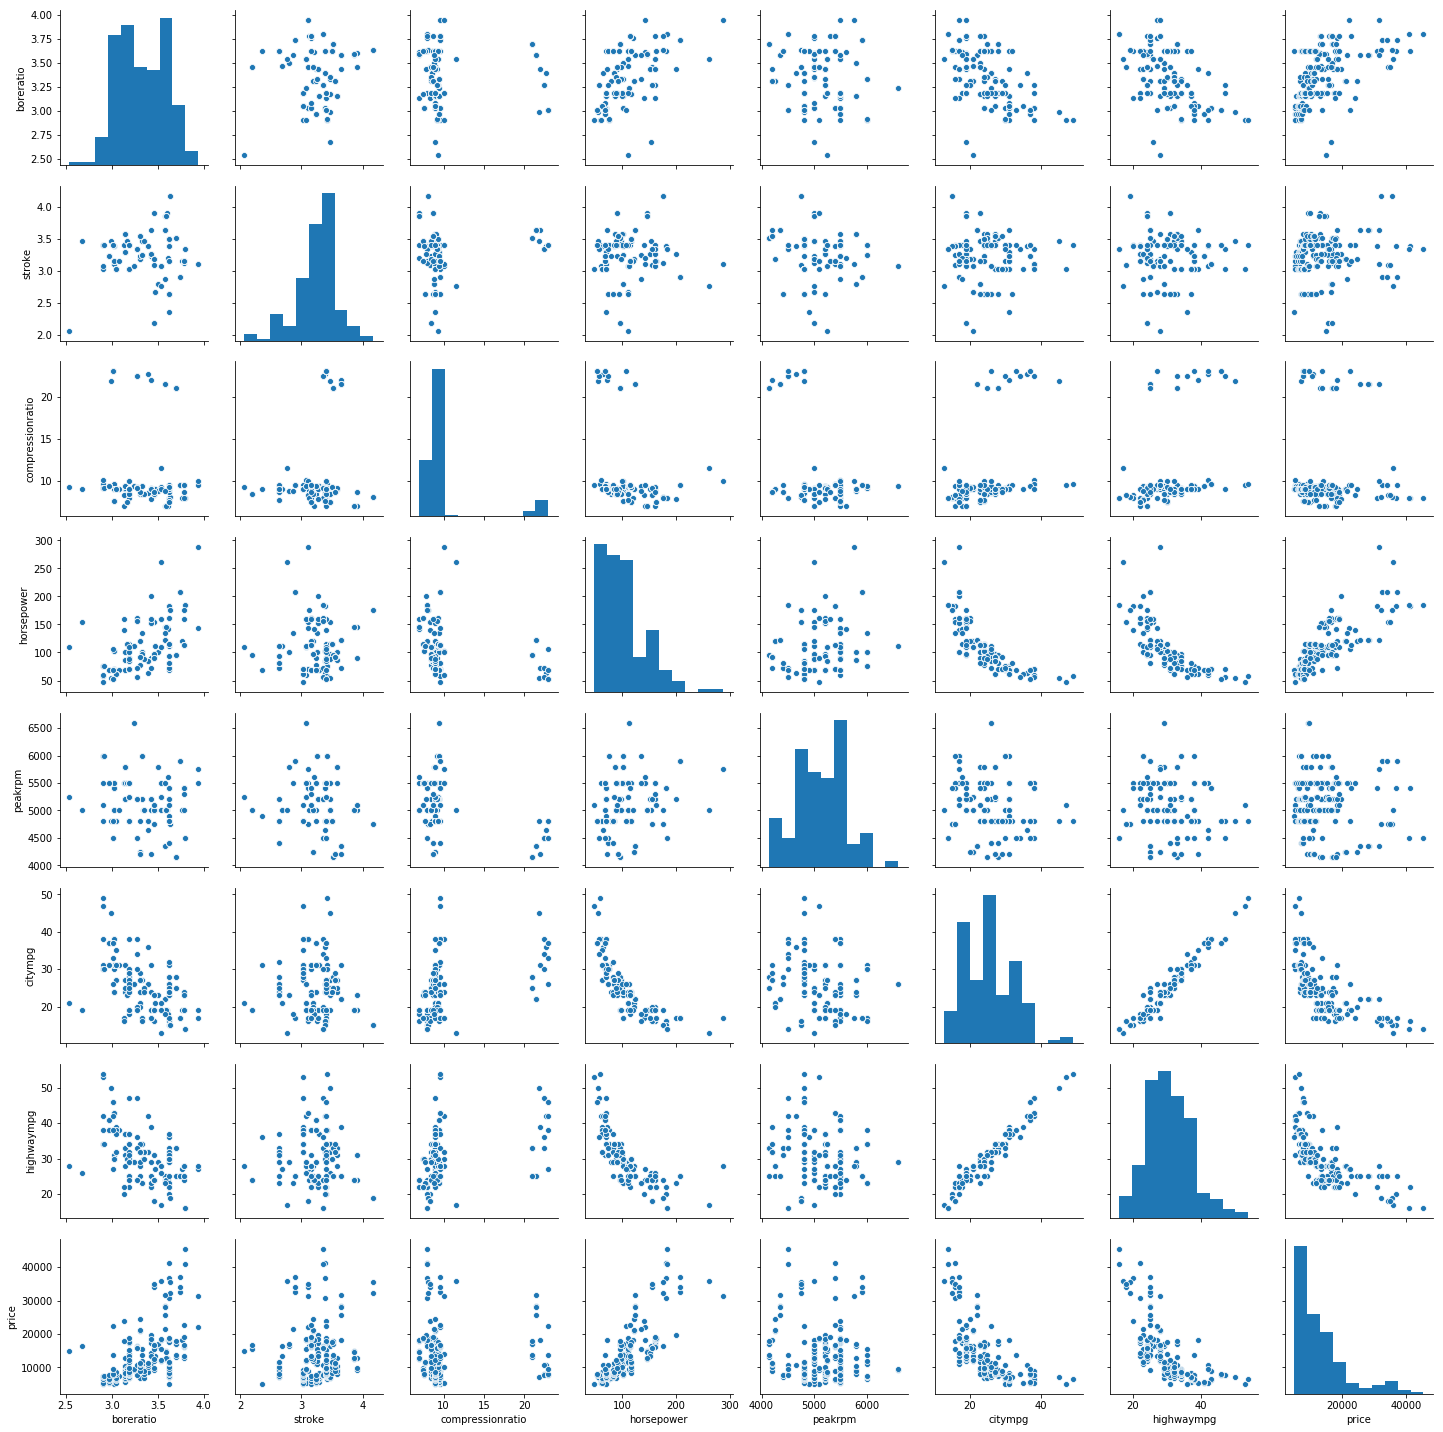

In [13]:
#Set2 of the numerical variables

numerical_pricing2 = pricing[['boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

sns.pairplot(numerical_pricing2)

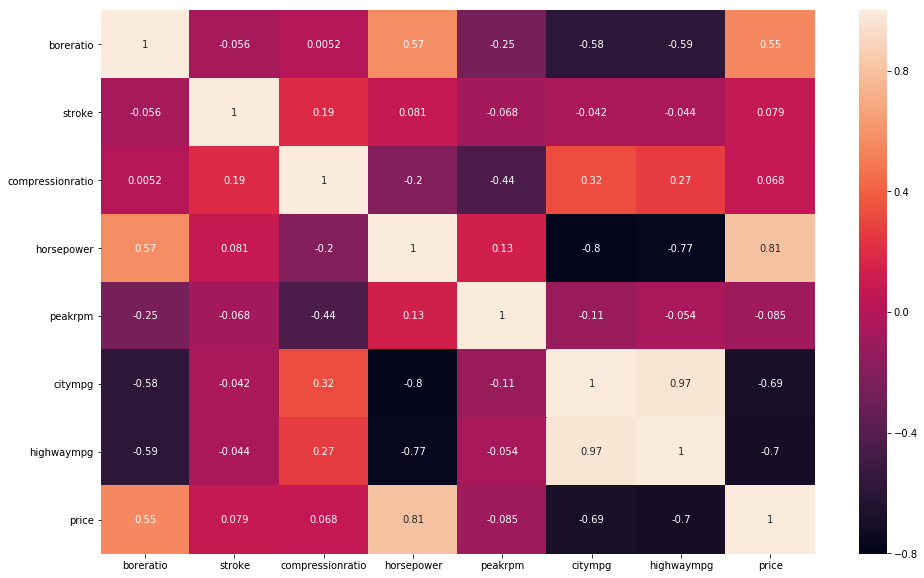

In [15]:
#heatmap of the same dataset (set2)

plt.figure(figsize = (16,10))
sns.heatmap(numerical_pricing2.corr(), annot = True)
plt.show()

- In the above scatterplots, horsepower seems to have the appreciable linear correlation with price.

## Data Preparation

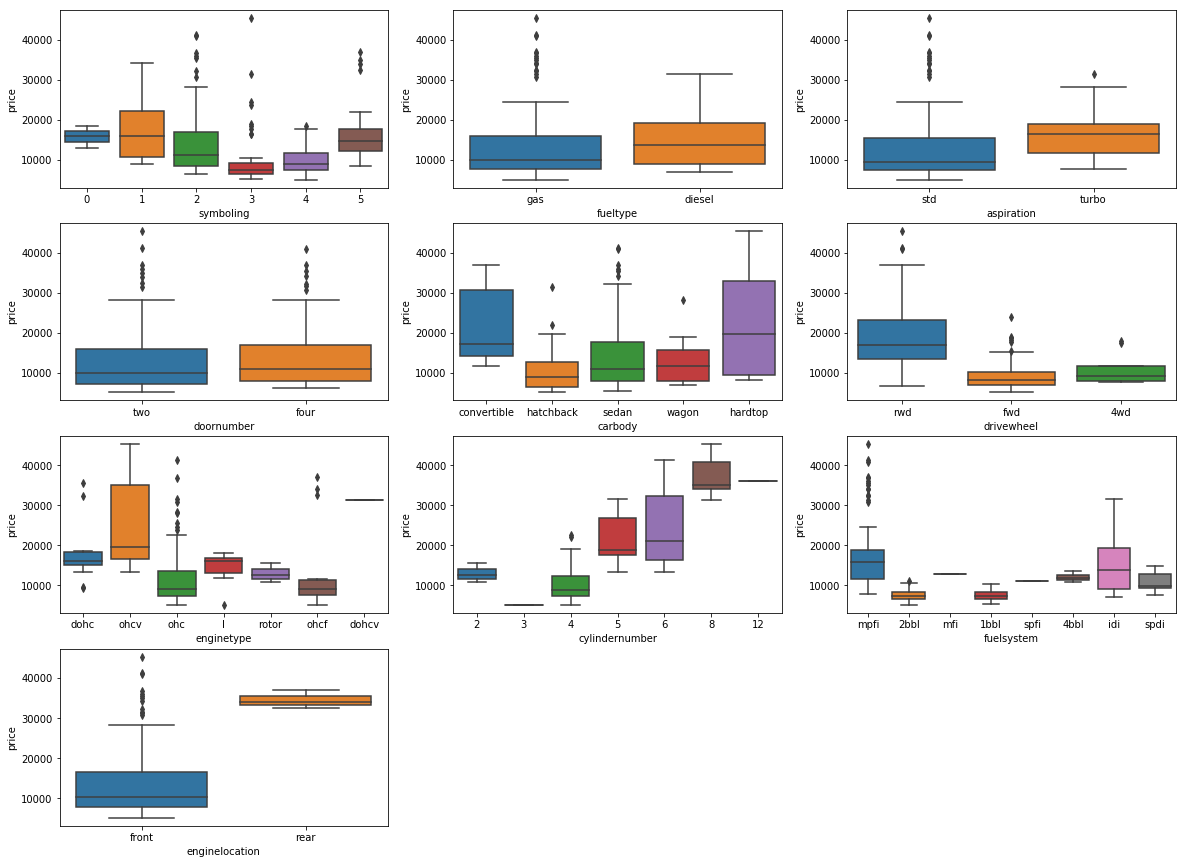

In [16]:
# Analysing the other predictor variables having categorical values

plt.figure(figsize = (20,15))
plt.subplot(4,3,1)
sns.boxplot(x='symboling', y='price', data = pricing)
plt.subplot(4,3,2)
sns.boxplot(x='fueltype', y='price', data = pricing)
plt.subplot(4,3,3)
sns.boxplot(x='aspiration', y='price', data = pricing)
plt.subplot(4,3,4)
sns.boxplot(x='doornumber', y='price', data = pricing)
plt.subplot(4,3,5)
sns.boxplot(x='carbody', y='price', data = pricing)
plt.subplot(4,3,6)
sns.boxplot(x='drivewheel', y='price', data = pricing)
plt.subplot(4,3,7)
sns.boxplot(x='enginetype', y='price', data = pricing)
plt.subplot(4,3,8)
sns.boxplot(x='cylindernumber', y='price', data = pricing)
plt.subplot(4,3,9)
sns.boxplot(x='fuelsystem', y='price', data = pricing)
plt.subplot(4,3,10)
sns.boxplot(x='enginelocation', y='price', data = pricing)
plt.show()

- Analyzing boxplot for predictor variable - "Symboling"
    - There is no significant outcome except the fact that the price range in Symboling 3 is spread from as low as 5K to as high as 45K while most of its' prices are around 10K or below range.


- Analyzing boxplot for predictor variable - "Fuel Type"
    - There is no appreciable outcome except the fact the car having fuel type 'gas' have price spread across till the highest price (45K) as well while for that of 'diesel', the prices would be max at around 30K mark.


- Analyzing boxplot for predictor variable - "aspiration"
    - There is no significant outcome except the fact that the price range in 'std' have price spread across till the highest price (45K) and as low as 5K. 


- Analysins boxplot for predictor variable - "doornumber"
    - There is no significant outcome as both the boxes are quite similar.


- Analysins boxplot for predictor variable - "carbody"
    - There is quite wide spread in the prices of carbody type 'hardtop' while "wagon" and "hatchback" are not lower range cars of under 20K


- Analysins boxplot for predictor variable - "drivewheel"
    -the cateogry of drivewheel "4wd" seems to be a data issue and should be "fwd" based on the initutive knowledge of motor vehicles. These categories should be clubeed to "fwd" only instead of 2 different categories.


- Analysins boxplot for predictor variable - "enginetype"
    - the category "dohcv" not only having single entry in the dataset but also looks almost similar to catgory "ohcv" or "dohc". It's surely a data error and "dohcv" should be replaced with either "ohcv" or "dohc".  


- Analysins boxplot for predictor variable - "cylindernumber"
    - the category "4" and "5" are having single entry each but nothing can be said about whether it's a data issue or cars having such cylindernumber exists. So, it would be left as it is.


- Analysins boxplot for predictor variable - "fuelsystem"
    - category  "mpfi" and "spfi" as well "mfi" are almost similar with former category and latter are having single entry each in the datset, which is purely a data error and should be both changed to "mpfi".  

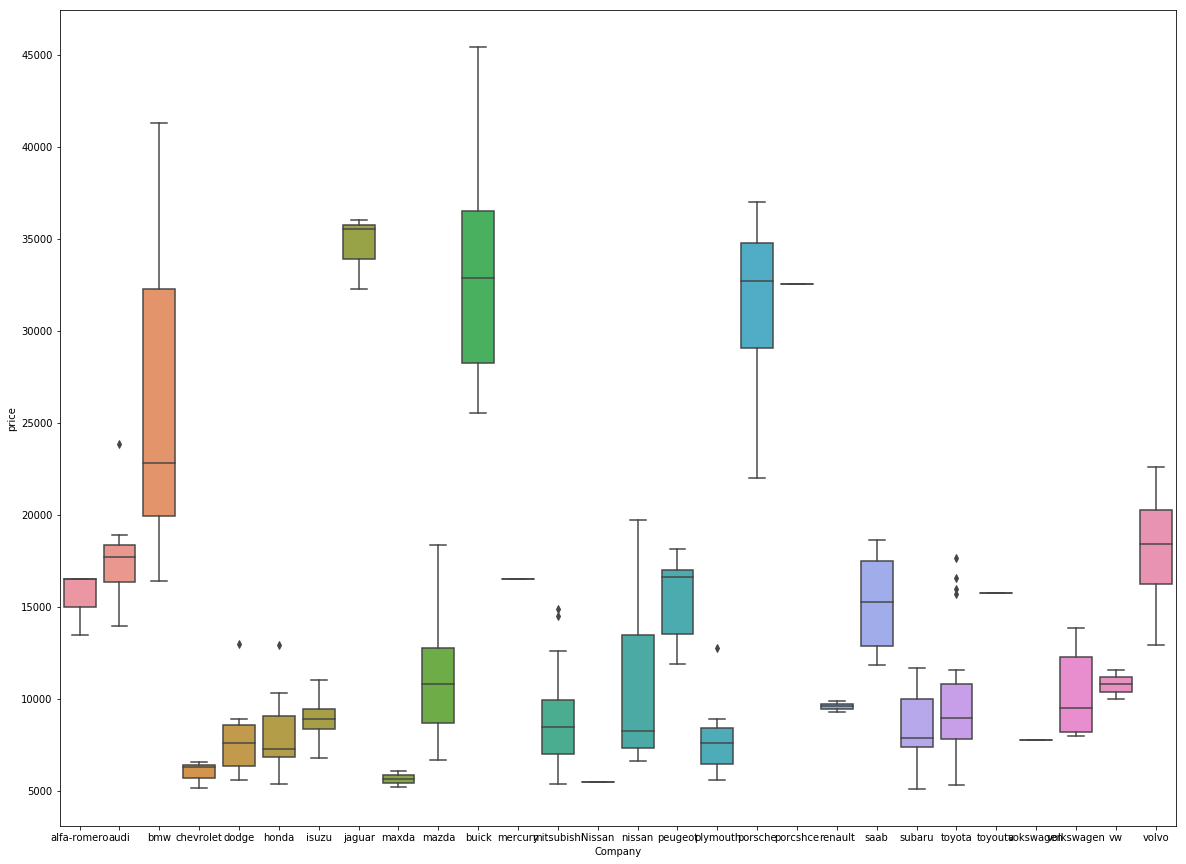

In [17]:
#Plotting the boxplot of variable "company"

plt.figure(figsize = (20,15))
sns.boxplot(x='Company', y='price', data = pricing)

- The box plot drawn for the company names are not understandable due the presence of 23 company names in single chart.

In [18]:
#Viewing all the unique values available in the "company" variable

pricing.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- it can be observed that there are some data duplicacy issues in some of the company names such as -
        -'maxda'&'mazda'
        -'nissan'&'Nissan'
        -'porsche'&'porcshce'
        -'toyota'&'toyouta'
        -'vokswagen','volkswagen'&'vw'

In [19]:
#Replacing all the duplicates/wrong data values with their corresponding correct values

pricing.replace(to_replace = "maxda", value ="mazda", inplace = True)
pricing.replace(to_replace = "Nissan", value ="nissan", inplace = True)
pricing.replace(to_replace = "porcshce", value ="porsche", inplace = True)
pricing.replace(to_replace = "toyouta", value ="toyota", inplace = True)
pricing.replace(to_replace = ["vw","vokswagen"], value ="volkswagen", inplace = True)
pricing.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

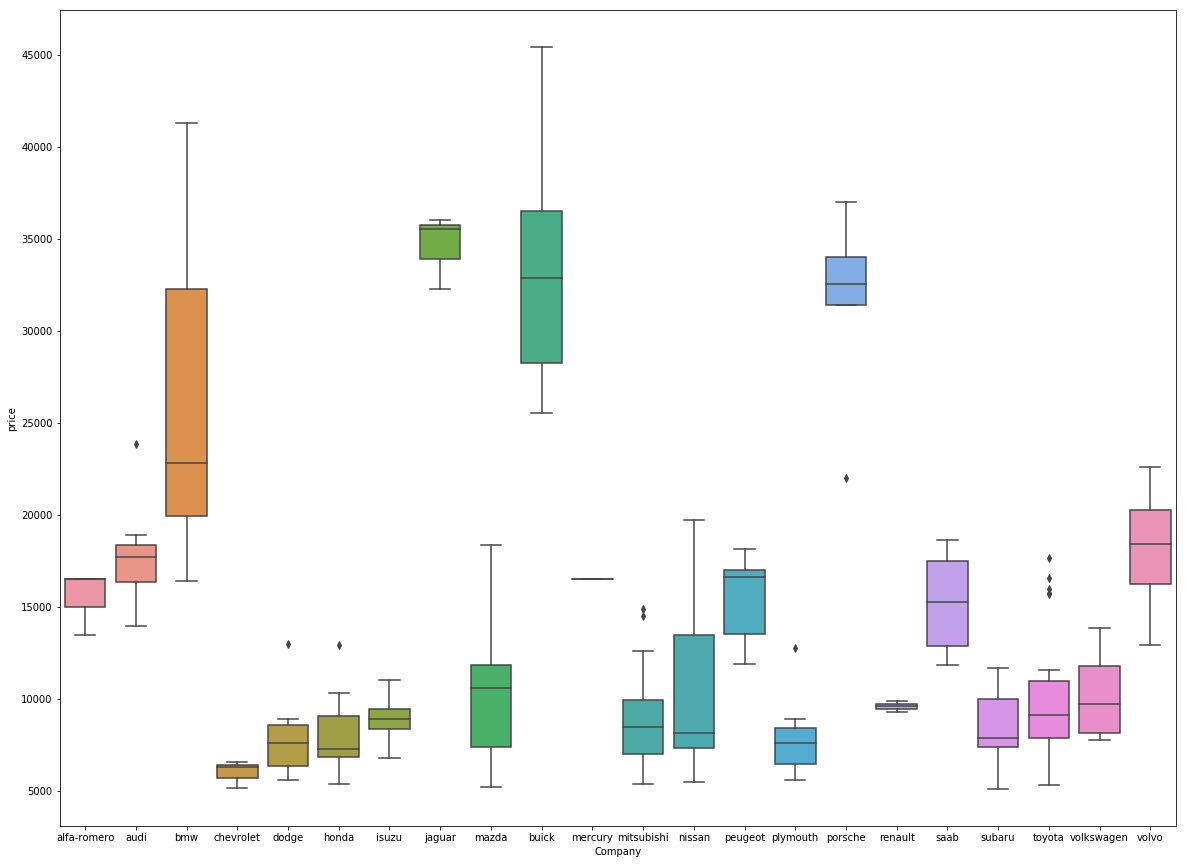

In [20]:
#plotting boxplot post chaninging the duplicates

plt.figure(figsize = (20,15))
sns.boxplot(x='Company', y='price', data = pricing)

- Now the company names are clearly visible on x-axis and readability of the boxplot has increased

In [21]:
#Checking the count in each of the company names
pricing.Company.value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: Company, dtype: int64

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']


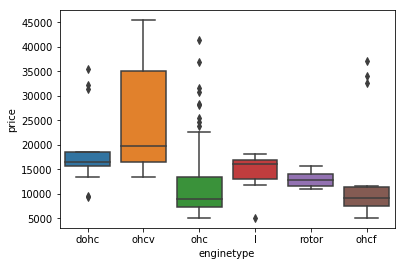

In [22]:
# changing "dohcv" to "dohc" in variable "enginetype"
pricing.replace(to_replace ="dohcv", value ="dohc", inplace = True)

#Checking the values available in the enginetype variable.
print(pricing.enginetype.unique())

# Viewing the boxplot post data cleaning
sns.boxplot(x='enginetype', y='price', data = pricing)

['mpfi' '2bbl' '1bbl' '4bbl' 'idi' 'spdi']


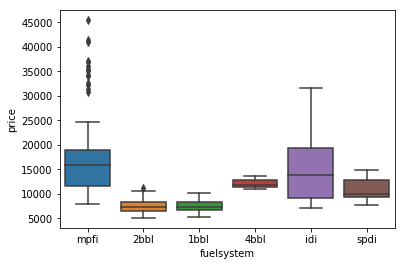

In [23]:
#changing "spfi" & "mfi" to "mpfi" in variable "fuelsystem"

pricing.replace(to_replace = ["spfi","mfi"], value ="mpfi", inplace = True)


#Checking the values available in the enginetype variable.
print(pricing.fuelsystem.unique())

# Viewing the boxplot post data cleaning
sns.boxplot(x='fuelsystem', y='price', data = pricing)

In [24]:
# Assigning binary (0 & 1) to categorical variable - fueltype 

varlist = ['fueltype']
pricing[varlist] = pricing[varlist].apply(lambda x : x.map({'gas': 1, 'diesel':0}))
pricing.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [25]:
# Assigning binary to categorical variable - aspiration 

varlist = ['aspiration']
pricing[varlist] = pricing[varlist].apply(lambda x : x.map({'std': 1, 'turbo':0}))
pricing.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,1,1,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [26]:
# Assigning binary to categorical variable - doornumber 

varlist = ['doornumber']
pricing[varlist] = pricing[varlist].apply(lambda x : x.map({'two': 1, 'four':0}))
pricing.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,1,1,1,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [27]:
# Assigning binary to categorical variable - enginelocation 

varlist = ['enginelocation']
pricing[varlist] = pricing[varlist].apply(lambda x : x.map({'front': 1, 'rear':0}))
pricing.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero


In [28]:
# Dummy variables for categorical variable - company
dummy_company = pd.get_dummies(pricing['Company'])
dummy_company.tail()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# the same information can be represented by 21 columns only.
# Dropping the first dummy variable 
dummy_company = pd.get_dummies(pricing['Company'], drop_first= True )
dummy_company.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Concatenate dummy_company with the original dataset
pricing = pd.concat([pricing, dummy_company], axis = 1)
pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,4,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Dropping the redundant variable "company"
pricing = pricing.drop('Company', axis = 1)
pricing.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Dummy variables for categorical variable - carbody
dummy_carbody= pd.get_dummies(pricing['carbody'])
dummy_carbody.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [33]:
# the same information can be represented by 4 columns only.

# 0000 means convertible
# 0001 means wagon
# 0010 means sedan
# 0100 means hatchback
# 1000 means hardtop

In [34]:
# Dropping a redudant dummy variable "Convertible"
dummy_carbody = pd.get_dummies(pricing['carbody'], drop_first= True )
dummy_carbody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [35]:
#Concatenate dummy_carbody with the original dataset
pricing = pd.concat([pricing, dummy_carbody], axis = 1)
pricing.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,4,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [36]:
#Dropping the redundant variable "carbody"
pricing = pricing.drop('carbody', axis = 1)
pricing.head(1)

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,5,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Dummy variables for categorical variable - drivewheel
dummy_drivewheel = pd.get_dummies(pricing['drivewheel'])
dummy_drivewheel.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [38]:
# the same information can be represented by 2 columns only.

# 000 means 4wd
# 001 means rwd
# 010 means fwd

In [39]:
# Dropping a redudant dummy variable "4wd"
dummy_drivewheel = pd.get_dummies(pricing['drivewheel'], drop_first= True )
dummy_drivewheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [40]:
#Concatenate dummy_drivewheel with the original dataset
pricing = pd.concat([pricing, dummy_drivewheel], axis = 1)
pricing.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,5,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,5,1,1,1,rwd,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,1,rwd,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,0,fwd,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,1,0,1,0
4,4,1,1,0,4wd,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,1,0,0,0


In [41]:
#Dropping the redundant variable "drivewheel" from the dataframe
pricing = pricing.drop('drivewheel', axis = 1)
pricing.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
1,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,1,0,0,0,1
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,1,0,1,0
4,4,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,1,0,0,0


In [42]:
# Dummy variables for categorical variable - enginetype
dummy_enginetype = pd.get_dummies(pricing['enginetype'])
dummy_enginetype.head()

,dohc,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [43]:
# the same information can be represented by 6 columns only instead of 7.

# 1000000 means dohc
# 0100000 means dohcv
# 0010000 means I
# 0001000 means ohc
# 0000100 means ohcf
# 0000010 means ohcv
# 0000001 means rotor

In [44]:
# Dropping a redudant dummy variable "dohc"
dummy_enginetype = pd.get_dummies(pricing['enginetype'], drop_first= True )
dummy_enginetype.head()

,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,1,0,0,0


In [45]:
#Concatenate enginetype with the original dataset
pricing = pd.concat([pricing, dummy_enginetype], axis = 1)
pricing.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor
0,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,1,0,0,0,0,0
1,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,1,0,0,0,0,0
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,0
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,1,0,0,1,0,0,0
4,4,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,1,0,0,0


In [46]:
#Dropping the redundant variable "enginetype" from the dataframe
pricing = pricing.drop('enginetype', axis = 1)
pricing.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,hatchback,sedan,wagon,fwd,rwd,l,ohc,ohcf,ohcv,rotor
0,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,1,0,0,0,0,0
1,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,1,0,0,0,0,0
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,0
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,1,0,0,1,0,0,0
4,4,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,1,0,0,0


In [47]:
# Dummy variables for categorical variable - fuelsystem
dummy_fuelsystem = pd.get_dummies(pricing['fuelsystem'])
dummy_fuelsystem.head()

,1bbl,2bbl,4bbl,idi,mpfi,spdi
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [48]:
# the same information can be represented by 7 columns only instead of 8.

# 10000000 means 1bbl
# 01000000 means 2bbl
# 00100000 means 4bbl
# 00010000 means idi
# 00001000 means mfi
# 00000100 means mpfi
# 00000010 means spdi
# 00000001 means spfi

In [49]:
# Dropping a redudant dummy variable "1bbl"
dummy_fuelsystem = pd.get_dummies(pricing['fuelsystem'], drop_first= True )
dummy_fuelsystem.head()

,2bbl,4bbl,idi,mpfi,spdi
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [50]:
#Concatenate fuelsystem with the original dataset
pricing = pd.concat([pricing, dummy_fuelsystem], axis = 1)
pricing.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi
0,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,0,0,1,0
4,4,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,0


In [51]:
#Dropping the redundant variable "fuelsystem" from the dataframe
pricing = pricing.drop('fuelsystem', axis = 1)
pricing.head(5)

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi
0,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,5,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,3,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,4,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,0,0,1,0
4,4,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,0


In [52]:
#Viewing all the columns thus available for modelling

pricing.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi',
       'mpfi', 'spdi'],
      dtype='object')

## Data modeling

In [53]:
#train-test split

df_train, df_test = train_test_split(pricing, train_size = 0.80, test_size = 0.20, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(164, 57)
(41, 57)


In [55]:
# Scaling the variables - 

# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of only numeric variables
num_vars = ['wheelbase', 'symboling','carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
#Looking into the statistical details of the numeric data of train dataframe. All the numeric values are skewed between 0 and 1
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.567073,0.896341,0.829268,0.432927,0.987805,0.404605,0.519899,0.454726,0.482927,0.398579,...,0.054878,0.719512,0.079268,0.054878,0.02439,0.353659,0.018293,0.103659,0.420732,0.042683
std,0.241953,0.305751,0.377427,0.496998,0.110092,0.197731,0.197651,0.179980,0.205820,0.202330,...,0.228440,0.450613,0.270984,0.228440,0.15473,0.479569,0.134418,0.305751,0.495189,0.202760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.409756,0.308333,0.341667,0.247673,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.491667,0.347944,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.475862,0.615041,0.516667,0.641667,0.522789,...,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing data into X and Y sets for the model building

In [57]:
y_train = df_train.pop('price')
X_train = df_train

## Training the model

In [58]:
# Using RFE (Recursive Feature Elimination) to pick the variables for modelling - 

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [60]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
#listing all the variables based on their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('fueltype', False, 7),
 ('aspiration', False, 26),
 ('doornumber', False, 36),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', False, 34),
 ('enginesize', True, 1),
 ('boreratio', False, 17),
 ('stroke', False, 27),
 ('compressionratio', False, 3),
 ('horsepower', False, 33),
 ('peakrpm', False, 5),
 ('citympg', False, 6),
 ('highwaympg', False, 30),
 ('audi', False, 18),
 ('bmw', True, 1),
 ('buick', False, 31),
 ('chevrolet', False, 10),
 ('dodge', False, 2),
 ('honda', False, 9),
 ('isuzu', False, 15),
 ('jaguar', False, 32),
 ('mazda', False, 13),
 ('mercury', False, 41),
 ('mitsubishi', True, 1),
 ('nissan', False, 11),
 ('peugeot', True, 1),
 ('plymouth', False, 8),
 ('porsche', False, 16),
 ('renault', True, 1),
 ('saab', False, 24),
 ('subaru', True, 1),
 ('toyota', True, 1),
 ('volkswagen', False, 14),
 ('volvo', False, 35)

In [62]:
#final number of predictor variables selected for further modelling
col = X_train.columns[rfe.support_]
print(col)

Index(['enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'bmw', 'mitsubishi', 'peugeot', 'renault',
       'subaru', 'toyota', 'l', 'ohcf'],
      dtype='object')


In [63]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,bmw,mitsubishi,peugeot,renault,subaru,toyota,l,ohcf
3,1,0.455172,0.577236,0.491667,0.541667,0.329325,0.181132,0,0,0,0,0,0,0,0
157,1,0.313793,0.409756,0.341667,0.416667,0.240884,0.139623,0,0,0,0,0,1,0,0
81,1,0.334483,0.518699,0.425000,0.133333,0.325834,0.230189,0,1,0,0,0,0,0,0
32,1,0.244828,0.144715,0.308333,0.400000,0.135376,0.067925,0,0,0,0,0,0,0,0
99,1,0.365517,0.525203,0.408333,0.575000,0.324282,0.222642,0,0,0,0,0,0,0,0


In [64]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
#fit the data
lm = sm.OLS(y_train,X_train_rfe).fit()

In [66]:
#Resulting the summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           9.47e-81
Time:                        23:34:41   Log-Likelihood:                 245.71
No. Observations:                 164   AIC:                            -461.4
Df Residuals:                     149   BIC:                            -414.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1920      0.027      7.

- "wheelbase" has very high p value. Dropping "wheelbase".

In [67]:
X_train_new = X_train_rfe.drop(['wheelbase'], axis=1)

In [68]:
# Adding the constant, fit the model and print the summary
X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.63e-81
Time:                        23:34:46   Log-Likelihood:                 244.81
No. Observations:                 164   AIC:                            -461.6
Df Residuals:                     150   BIC:                            -418.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1775      0.025      7.208      0.000       0.129       0.226
enginelocation    -0.3016      0.023    -13.062      0.000      -0.347      -0.256
carlength         -0.1535      0.060     -2.579      0.011      -0.271      -0.036
carwidth           0.3926      0.055      7.116      0.000       0.284       0.502
carheight         -0.0826      0.029     -2.873      0.005      -0.139      -0.026
curbweight         0.6106      0.077      7.968      0.000       0.459       0.762
enginesize         0.1678      0.074      2.279      0.024       0.022       0.313
bmw                0.2546      0.025      9.995      0.000       0.204       0.305
mitsubishi        -0.0865      0.019     -4.533      0.000      -0.124      -0.049
peugeot           -0.2869      0.065     -4.441      0.000      -0.415      -0.159
renault           -0.1162      0.041     -2.822      0.005      -0.198      -0.035
subaru            -0.2645      0.026    -10.278      0.000      -0.315      -0.214
toyota            -0.0448      0.013     -3.356      0.001      -0.071      -0.018
l                  0.1622      0.059      2.741      0.007       0.045       0.279
ohcf               0.2147      0.022      9.701      0.000       0.171       0.258
==============================================================================
Omnibus:                       15.933   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.170
Skew:                           0.357   Prob(JB):                     8.49e-09
Kurtosis:                       5.220   Cond. No.                     2.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
# Removing "const" before running the VIF
X_train_new = X_train_new.drop(['const'], axis=1)

In [70]:
# Adding the constant, fit the model and print the summary
X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.63e-81
Time:                        23:34:52   Log-Likelihood:                 244.81
No. Observations:                 164   AIC:                            -461.6
Df Residuals:                     150   BIC:                            -418.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1775      0.025      7.208      0.000       0.129       0.226
enginelocation    -0.3016      0.023    -13.062      0.000      -0.347      -0.256
carlength         -0.1535      0.060     -2.579      0.011      -0.271      -0.036
carwidth           0.3926      0.055      7.116      0.000       0.284       0.502
carheight         -0.0826      0.029     -2.873      0.005      -0.139      -0.026
curbweight         0.6106      0.077      7.968      0.000       0.459       0.762
enginesize         0.1678      0.074      2.279      0.024       0.022       0.313
bmw                0.2546      0.025      9.995      0.000       0.204       0.305
mitsubishi        -0.0865      0.019     -4.533      0.000      -0.124      -0.049
peugeot           -0.2869      0.065     -4.441      0.000      -0.415      -0.159
renault           -0.1162      0.041     -2.822      0.005      -0.198      -0.035
subaru            -0.2645      0.026    -10.278      0.000      -0.315      -0.214
toyota            -0.0448      0.013     -3.356      0.001      -0.071      -0.018
l                  0.1622      0.059      2.741      0.007       0.045       0.279
ohcf               0.2147      0.022      9.701      0.000       0.171       0.258
==============================================================================
Omnibus:                       15.933   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.170
Skew:                           0.357   Prob(JB):                     8.49e-09
Kurtosis:                       5.220   Cond. No.                     2.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
#Calculatin the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginelocation,15.42
4,curbweight,12.12
8,peugeot,9.82
12,l,9.21
10,subaru,8.17
13,ohcf,8.07
1,carlength,6.98
5,enginesize,6.06
2,carwidth,4.97
3,carheight,1.77


Drop "enginelocation" due to its' high VIF.

In [72]:
X_train_new = X_train_new.drop(['enginelocation'], axis=1)

In [73]:
# Adding the constant, fit the model and print the summary
X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     163.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.63e-81
Time:                        23:34:59   Log-Likelihood:                 244.81
No. Observations:                 164   AIC:                            -461.6
Df Residuals:                     150   BIC:                            -418.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1241      0.018     -7.074      0.000      -0.159      -0.089
carlength     -0.1535      0.060     -2.579      0.011      -0.271      -0.036
carwidth       0.3926      0.055      7.116      0.000       0.284       0.502
carheight     -0.0826      0.029     -2.873      0.005      -0.139      -0.026
curbweight     0.6106      0.077      7.968      0.000       0.459       0.762
enginesize     0.1678      0.074      2.279      0.024       0.022       0.313
bmw            0.2546      0.025      9.995      0.000       0.204       0.305
mitsubishi    -0.0865      0.019     -4.533      0.000      -0.124      -0.049
peugeot       -0.2869      0.065     -4.441      0.000      -0.415      -0.159
renault       -0.1162      0.041     -2.822      0.005      -0.198      -0.035
subaru        -0.5661      0.047    -12.055      0.000      -0.659      -0.473
toyota        -0.0448      0.013     -3.356      0.001      -0.071      -0.018
l              0.1622      0.059      2.741      0.007       0.045       0.279
ohcf           0.5163      0.044     11.809      0.000       0.430       0.603
==============================================================================
Omnibus:                       15.933   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.170
Skew:                           0.357   Prob(JB):                     8.49e-09
Kurtosis:                       5.220   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,curbweight,56.14
0,carlength,54.13
1,carwidth,31.48
4,enginesize,21.22
7,peugeot,9.67
11,l,9.37
2,carheight,9.13
12,ohcf,7.54
9,subaru,7.47
10,toyota,1.26


Dropping "curbweight" for its' high VIF

In [75]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [76]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     121.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.85e-71
Time:                        23:35:06   Log-Likelihood:                 215.87
No. Observations:                 164   AIC:                            -405.7
Df Residuals:                     151   BIC:                            -365.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1570      0.020     -7.743      0.000      -0.197      -0.117
carlength      0.0733      0.062      1.179      0.240      -0.050       0.196
carwidth       0.5192      0.063      8.265      0.000       0.395       0.643
carheight     -0.0774      0.034     -2.264      0.025      -0.145      -0.010
enginesize     0.5691      0.064      8.911      0.000       0.443       0.695
bmw            0.2411      0.030      7.978      0.000       0.181       0.301
mitsubishi    -0.0839      0.023     -3.696      0.000      -0.129      -0.039
peugeot       -0.2623      0.077     -3.419      0.001      -0.414      -0.111
renault       -0.1550      0.049     -3.189      0.002      -0.251      -0.059
subaru        -0.5472      0.056     -9.813      0.000      -0.657      -0.437
toyota        -0.0360      0.016     -2.275      0.024      -0.067      -0.005
l              0.1927      0.070      2.745      0.007       0.054       0.331
ohcf           0.4995      0.052      9.620      0.000       0.397       0.602
==============================================================================
Omnibus:                        7.022   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.762
Skew:                           0.426   Prob(JB):                       0.0340
Kurtosis:                       3.513   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Calculating the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,carlength,42.72
1,carwidth,29.95
3,enginesize,11.33
6,peugeot,9.54
10,l,9.36
2,carheight,9.04
11,ohcf,7.48
8,subaru,7.43
9,toyota,1.26
4,bmw,1.20


High p-value and high VIF value of "carlength". Dropping "carlength"

In [78]:
X_train_new = X_train_new.drop(['carlength'], axis=1)

In [79]:
# Adding the constant, fit the model and print the summary
X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     132.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           6.49e-72
Time:                        23:35:13   Log-Likelihood:                 215.12
No. Observations:                 164   AIC:                            -406.2
Df Residuals:                     152   BIC:                            -369.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1556      0.020     -7.679      0.000      -0.196      -0.116
carwidth       0.5631      0.051     11.107      0.000       0.463       0.663
carheight     -0.0577      0.030     -1.932      0.055      -0.117       0.001
enginesize     0.5955      0.060      9.948      0.000       0.477       0.714
bmw            0.2465      0.030      8.241      0.000       0.187       0.306
mitsubishi    -0.0810      0.023     -3.585      0.000      -0.126      -0.036
peugeot       -0.2462      0.076     -3.257      0.001      -0.396      -0.097
renault       -0.1492      0.048     -3.081      0.002      -0.245      -0.054
subaru        -0.5408      0.056     -9.732      0.000      -0.651      -0.431
toyota        -0.0338      0.016     -2.150      0.033      -0.065      -0.003
l              0.1825      0.070      2.616      0.010       0.045       0.320
ohcf           0.4946      0.052      9.544      0.000       0.392       0.597
==============================================================================
Omnibus:                        9.166   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.254
Skew:                           0.497   Prob(JB):                      0.00978
Kurtosis:                       3.605   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,carwidth,17.28
2,enginesize,9.95
5,peugeot,9.27
9,l,9.24
10,ohcf,7.44
7,subaru,7.37
1,carheight,5.97
8,toyota,1.24
3,bmw,1.17
4,mitsubishi,1.09


high p value of "carheight" is removed first.

In [81]:
X_train_new = X_train_new.drop(['carheight'], axis=1)

In [82]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.30e-72
Time:                        23:35:19   Log-Likelihood:                 213.13
No. Observations:                 164   AIC:                            -404.3
Df Residuals:                     153   BIC:                            -370.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1778      0.017    -10.540      0.000      -0.211      -0.144
carwidth       0.5399      0.050     10.864      0.000       0.442       0.638
enginesize     0.6181      0.059     10.435      0.000       0.501       0.735
bmw            0.2383      0.030      7.977      0.000       0.179       0.297
mitsubishi    -0.0682      0.022     -3.130      0.002      -0.111      -0.025
peugeot       -0.2559      0.076     -3.363      0.001      -0.406      -0.106
renault       -0.1454      0.049     -2.977      0.003      -0.242      -0.049
subaru        -0.5427      0.056     -9.683      0.000      -0.653      -0.432
toyota        -0.0368      0.016     -2.330      0.021      -0.068      -0.006
l              0.1787      0.070      2.540      0.012       0.040       0.318
ohcf           0.4962      0.052      9.492      0.000       0.393       0.599
==============================================================================
Omnibus:                       10.518   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.418
Skew:                           0.503   Prob(JB):                      0.00332
Kurtosis:                       3.811   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,carwidth,9.28
4,peugeot,9.17
1,enginesize,9.15
8,l,9.00
9,ohcf,7.39
6,subaru,7.36
7,toyota,1.15
2,bmw,1.14
3,mitsubishi,1.07
5,renault,1.02


high VIF for "carwidth" to be removed

In [84]:
X_train_new = X_train_new.drop(['carwidth'], axis=1)

In [85]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     82.48
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.49e-54
Time:                        23:35:25   Log-Likelihood:                 166.24
No. Observations:                 164   AIC:                            -312.5
Df Residuals:                     154   BIC:                            -281.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0415      0.015     -2.776      0.006      -0.071      -0.012
enginesize     1.1074      0.051     21.700      0.000       1.007       1.208
bmw            0.1886      0.039      4.816      0.000       0.111       0.266
mitsubishi    -0.0862      0.029     -2.992      0.003      -0.143      -0.029
peugeot       -0.0338      0.097     -0.347      0.729      -0.226       0.158
renault       -0.1315      0.065     -2.031      0.044      -0.259      -0.004
subaru        -0.3796      0.072     -5.299      0.000      -0.521      -0.238
toyota        -0.0667      0.021     -3.233      0.001      -0.107      -0.026
l              0.0425      0.092      0.462      0.645      -0.139       0.224
ohcf           0.3259      0.066      4.925      0.000       0.195       0.457
==============================================================================
Omnibus:                       18.623   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.575
Skew:                           0.743   Prob(JB):                     1.25e-05
Kurtosis:                       4.047   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,peugeot,9.08
7,l,9.00
8,ohcf,6.88
5,subaru,6.64
0,enginesize,1.50
6,toyota,1.13
1,bmw,1.12
2,mitsubishi,1.06
4,renault,1.02


"peugeot" is to be removed first for its' high VIF and p-value

In [87]:
X_train_new = X_train_new.drop(['peugeot'], axis=1)

In [88]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     93.31
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.65e-55
Time:                        23:35:32   Log-Likelihood:                 166.18
No. Observations:                 164   AIC:                            -314.4
Df Residuals:                     155   BIC:                            -286.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0409      0.015     -2.762      0.006      -0.070      -0.012
enginesize     1.1047      0.050     21.964      0.000       1.005       1.204
bmw            0.1891      0.039      4.845      0.000       0.112       0.266
mitsubishi    -0.0863      0.029     -3.002      0.003      -0.143      -0.030
renault       -0.1314      0.065     -2.035      0.044      -0.259      -0.004
subaru        -0.3805      0.071     -5.330      0.000      -0.522      -0.239
toyota        -0.0668      0.021     -3.245      0.001      -0.107      -0.026
l              0.0125      0.031      0.398      0.691      -0.050       0.075
ohcf           0.3266      0.066      4.953      0.000       0.196       0.457
==============================================================================
Omnibus:                       18.606   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.475
Skew:                           0.745   Prob(JB):                     1.32e-05
Kurtosis:                       4.034   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,ohcf,6.88
4,subaru,6.64
0,enginesize,1.49
5,toyota,1.13
1,bmw,1.12
6,l,1.07
2,mitsubishi,1.06
3,renault,1.02


remove "l" for high p value

In [90]:
X_train_new = X_train_new.drop(['l'], axis=1)

In [91]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.66e-56
Time:                        23:35:40   Log-Likelihood:                 166.09
No. Observations:                 164   AIC:                            -316.2
Df Residuals:                     156   BIC:                            -291.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0401      0.015     -2.741      0.007      -0.069      -0.011
enginesize     1.1055      0.050     22.056      0.000       1.007       1.205
bmw            0.1879      0.039      4.841      0.000       0.111       0.265
mitsubishi    -0.0873      0.029     -3.059      0.003      -0.144      -0.031
renault       -0.1325      0.064     -2.059      0.041      -0.260      -0.005
subaru        -0.3802      0.071     -5.341      0.000      -0.521      -0.240
toyota        -0.0678      0.020     -3.330      0.001      -0.108      -0.028
ohcf           0.3253      0.066      4.953      0.000       0.196       0.455
==============================================================================
Omnibus:                       17.779   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.170
Skew:                           0.725   Prob(JB):                     2.53e-05
Kurtosis:                       3.997   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,ohcf,6.86
4,subaru,6.63
0,enginesize,1.39
5,toyota,1.12
1,bmw,1.11
2,mitsubishi,1.05
3,renault,1.02


All p value are in range but few VIFs are above certain value(VIf = 2).

In [93]:
X_train_new = X_train_new.drop(['ohcf'], axis=1)

In [94]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     105.2
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.03e-52
Time:                        23:35:47   Log-Likelihood:                 154.12
No. Observations:                 164   AIC:                            -294.2
Df Residuals:                     157   BIC:                            -272.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0463      0.016     -2.963      0.004      -0.077      -0.015
enginesize     1.1561      0.053     21.971      0.000       1.052       1.260
bmw            0.1733      0.041      4.177      0.000       0.091       0.255
mitsubishi    -0.0918      0.031     -3.002      0.003      -0.152      -0.031
renault       -0.1398      0.069     -2.027      0.044      -0.276      -0.004
subaru        -0.0575      0.031     -1.869      0.063      -0.118       0.003
toyota        -0.0725      0.022     -3.325      0.001      -0.116      -0.029
==============================================================================
Omnibus:                       23.364   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.832
Skew:                           0.792   Prob(JB):                     4.50e-08
Kurtosis:                       4.562   Cond. No.                         9.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginesize,1.32
5,toyota,1.12
1,bmw,1.10
2,mitsubishi,1.05
4,subaru,1.03
3,renault,1.01


remove "subaru" for high p-value. 

In [96]:
X_train_new = X_train_new.drop(['subaru'], axis=1)

In [97]:
# Adding the constant, fit the model and print the summary

X_train_sm = sm.add_constant(X_train_new)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           9.62e-53
Time:                        23:35:53   Log-Likelihood:                 152.31
No. Observations:                 164   AIC:                            -292.6
Df Residuals:                     158   BIC:                            -274.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0541      0.015     -3.568      0.000      -0.084      -0.024
enginesize     1.1672      0.053     22.151      0.000       1.063       1.271
bmw            0.1766      0.042      4.227      0.000       0.094       0.259
mitsubishi    -0.0864      0.031     -2.814      0.006      -0.147      -0.026
renault       -0.1350      0.069     -1.943      0.054      -0.272       0.002
toyota        -0.0671      0.022     -3.080      0.002      -0.110      -0.024
==============================================================================
Omnibus:                       24.657   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.722
Skew:                           0.832   Prob(JB):                     1.75e-08
Kurtosis:                       4.567   Cond. No.                         9.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#Calculating the VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,enginesize,1.28
4,toyota,1.11
1,bmw,1.10
2,mitsubishi,1.05
3,renault,1.01


In [99]:
#predict the values for price
y_train_pred = lr_model.predict(X_train_sm)

Text(0.5, 0, 'Errors')

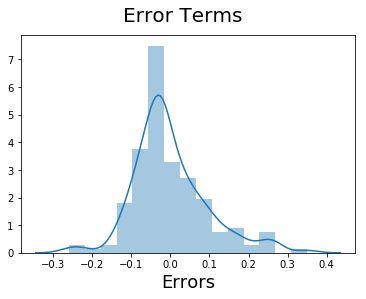

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [101]:
#Create a list of only numeric variables
num_vars = ['wheelbase', 'symboling','carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi
160,0.4,1,1,0,1,0.313793,0.409756,0.341667,0.433333,0.235066,...,0,1,0,0,0,1,0,0,0,0
186,0.8,1,1,0,1,0.368966,0.497561,0.433333,0.658333,0.305275,...,0,1,0,0,0,0,0,0,1,0
59,0.6,1,1,1,1,0.420690,0.596748,0.516667,0.491667,0.347944,...,0,1,0,0,0,1,0,0,0,0
165,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.400000,0.301396,...,0,0,0,0,0,0,0,0,1,0
140,0.8,1,1,1,1,0.231034,0.263415,0.291667,0.658333,0.291699,...,0,0,1,0,0,1,0,0,0,0


In [102]:
#To view the statistical details of the numerical variables

df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mpfi,spdi
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.0,41.000000,41.000000,41.000000
mean,0.565854,0.926829,0.780488,0.463415,0.975610,0.477544,0.599207,0.517683,0.536992,0.476215,...,0.073171,0.731707,0.048780,0.097561,0.0,0.195122,0.0,0.073171,0.658537,0.048780
std,0.278935,0.263652,0.419058,0.504854,0.156174,0.237096,0.202206,0.166533,0.190905,0.190466,...,0.263652,0.448575,0.218085,0.300406,0.0,0.401218,0.0,0.263652,0.480091,0.218085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.291667,0.158333,0.128394,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.320690,0.497561,0.408333,0.400000,0.347944,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.431034,0.570732,0.516667,0.591667,0.483320,...,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.610345,0.741463,0.575000,0.658333,0.603957,...,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,0.908333,0.935609,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000


In [103]:
#Divide X and y "test" data from the dataframe

y_test = df_test.pop('price')
X_test = df_test

In [104]:
#Assigning the final variables
X_test_new = X_test[X_train_new.columns]

In [105]:
# add a constant

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,enginesize,bmw,mitsubishi,renault,toyota
160,1.0,0.139623,0,0,0,1
186,1.0,0.181132,0,0,0,0
59,1.0,0.230189,0,0,0,0
165,1.0,0.139623,0,0,0,1
140,1.0,0.177358,0,0,0,0


In [106]:
#predict

y_test_pred = lr_model.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

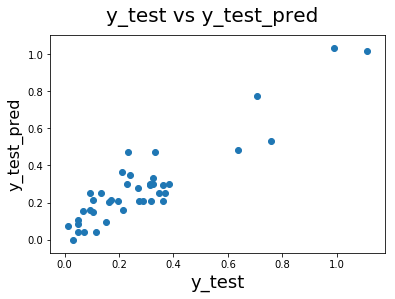

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

In [108]:
#import libraries for calculating r2_score for test dataset

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8415404512020075

### The r-square for the train set is - 0.796 while for that of test set is = 0.8415. The difference between both the r-square is less than the acceptable limit of 5%. 

### The final model has 5 predictor variables which would decide the pricing of the car are - 
- enginesize
- bmw
- mitsubishi
- renault
- toyota

Also, the variables(enginesize and bmw) are positively affecting the model while mitsubishi, renault and toyota are negatively
impacting the car price.

In [109]:
#Dropping all the variables which are manually dropped post running RFE
col1 = col.drop(['subaru','ohcf','l','peugeot','carwidth','carheight','carlength','curbweight','enginelocation','wheelbase'])

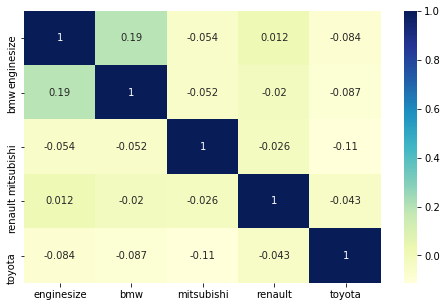

In [110]:
# Generating heatmap between the final predictor variables

# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(pricing[col1].corr(), cmap="YlGnBu", annot=True)
plt.show()

### The maximum correlation between the predictor variables is 19%. This is quite a good model to predict the pricing as none of the predictor variables are appreciably related.

### the final equation would be - 
price = -0.0541 +  1.1672*enginesize + 0.1766*bmw - 0.0864*mitsubishi -0.1350*renault - 0.0671*toyota 